# **Semantic Spotter Project**  
##### ~ Kiran Dalmiya

## **Objective**
**Overall RAG Application Specifications**


* **Problem Statement -** We are provided with a Insurance policy documents. Our goal here is to build a simple RAG application on the provided policy pdf document.

* **Solution Strategy -** Build a POC which should solve the following requirements:

  * Users would get responses from the Insurance policy document.
  * If they want to refer to the original page from which the bot is responding, the bot should provide a citation as well.

* **Goal -** Solving the above two requirements well in the POC would ensure that the accuracy of the overall model is good and therefore further improvisations and customizations make sense.

* **Data Used -** Insurance Policy document in pdf formate stored in a single folder

* **Tools used -** LlamaIndex has been used due to its powerful query engine, fast data processing using data loaders and directory readers as well as easier and faster implementation using fewer lines of code.

The main goal of this project was to build a smart system that can search through documents and give clear, helpful answers to questions.

 It combines two powerful tools:
* 	**LlamaIndex** (to search and find relevant information in documents)
* 	**GPT-3.5-turbo openai model** (to improve the answers and make them more user-friendly).

This system was designed to answer questions specifically related to insurance policy documents.


   #### Flowchart for System Design:
   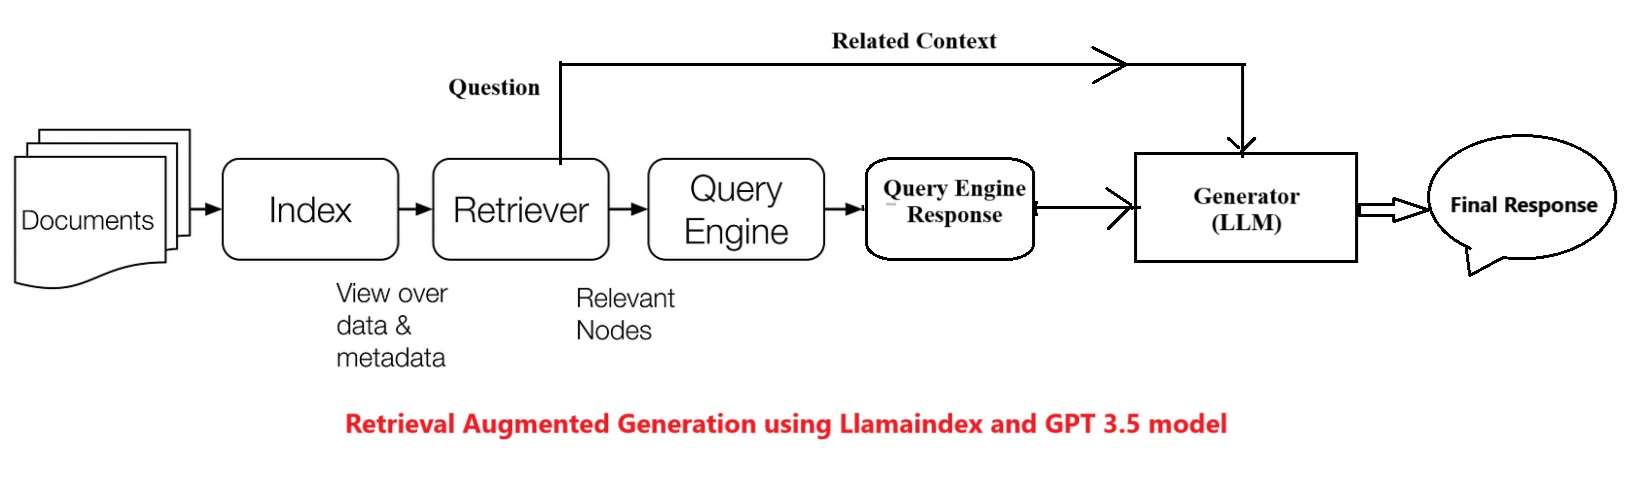

### Step 1: Install and Import the necessary libraries

In [2]:
# # Install necessary packages for the project         %pip install Llama-index==0.10.34
!pip install llama-index PyPDF2
!pip install -U -qq openai llama-index llama-index-core llama-index-readers-file llama-index-llms-openai llama-index-embeddings-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 

In [3]:
# Import LlamaIndex and OpenAI related libraries
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

### Step 2 : Mount Google Drive and Set the API key

In [4]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Retrieve OpenAI API key from the environment in Google Colab
from google.colab import userdata
openai.api_key = userdata.get('MyKey1')



### Step 3: Read Documents and Load Data

In [6]:
from llama_index.core import SimpleDirectoryReader

# Reading files from a directory in Google Drive
reader = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/Semantic Spotter Project")


In [7]:
# Use the load_data() method to read the files from the directory
documents = reader.load_data()

# Print number of Documents loaded (* its actually the total number of pages of documents)
print(f"Loaded {len(documents)} docs")


Loaded 64 docs


In [8]:
documents[0]

Document(id_='7bae2aec-82aa-45b6-8187-c1713caf6b86', embedding=None, metadata={'page_label': '1', 'file_name': 'Principal-Sample-Life-Insurance-Policy.pdf', 'file_path': '/content/drive/MyDrive/Semantic Spotter Project/Principal-Sample-Life-Insurance-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 222772, 'creation_date': '2024-09-18', 'last_modified_date': '2024-09-18'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n  \n \n \nGROUP POLICY FOR:  \nRHODE ISLAND JOHN DOE  \n \nALL MEMBERS  \nGroup Member Life Insurance  \n \nPrint Date: 07/16/2014  \n DOROTHEA GLAUSE  S655  \nRHODE ISLAND JOHN DOE  01/01/2014  \n711 HIGH STREET   \nGEORGE RI 02903   \n  \n \n \n                                       ', mimetype='text/plain', start_char_idx=N

In [9]:
type(documents)

list

### Step 4: Document Parsing and Building the Index

In [56]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML
from llama_index.core.evaluation import FaithfulnessEvaluator
from llama_index.core.evaluation import RelevancyEvaluator

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

# document-->nodes-->chunks
#nodes-->index
# # build index
index = VectorStoreIndex(nodes)       ## Load documents and build index directlty without using parseing explicitlt  :   index = VectorStoreIndex.from_documents(documents)

# Construct Query Engine
query_engine = index.as_query_engine()



### Step 5: Query the Engine and Generate Responses


In [13]:
## Query response function
def query_response(user_input):
  # Query the LlamaIndex (or VectorStoreIndex) for the response
  response = query_engine.query(user_input)

  # Create the query response including document metadata
  file_name = response.source_nodes[0].node.metadata['file_name'] + "page nos: " + response.source_nodes[0].node.metadata['page_label'] + ", " + response.source_nodes[1].node.metadata['page_label']

  # Complete response text to pass to GPT-3.5-turbo
  query_response = response.response + '\n Check further at ' + file_name

  return query_response,file_name


### Step 6 : Building Test *Pipeline*  
( Testing for Query Engine responces first..added for final responses also)

In [14]:
import pandas as pd

In [15]:
questions = ['How to Claim?', "What is the Grace period?",
             'What is discount can you provide on policy premium?']

In [20]:

def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    response=query_response(i)
    print(response)
    #print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot. ("GOOD"/"BAD")')
    user_input = input()

    # Access the last element of the tuple using indexing
    # Assuming the page information is the last element of the tuple
    page = response[-1]
    test_feedback.append((i,response,page,user_input))

    #page = query_response[-1]   #(i).split()[-1]
    #test_feedback.append((i,query_response(i),page,user_input))

  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Good or Bad'])
  return feedback_df

In [21]:
testing_pipeline(questions)

How to Claim?
('To file a claim for benefits under this Group Policy, a Member or Dependent must send a written notice to The Principal within 20 days of the loss. The Principal will then provide appropriate claim forms within 15 days of receiving the notice. Written proof of loss, including the date, nature, and extent of the loss, must be submitted to The Principal within 90 days of the loss. The Principal may request additional information to substantiate the loss. If a claim is denied, a claimant may request an appeal within 180 days of receiving notice of the denial. The Principal will conduct a full review and notify the claimant of the appeal decision within 45 days of receiving the appeal request.\n Check further at Principal-Sample-Life-Insurance-Policy.pdfpage nos: 62, 61', 'Principal-Sample-Life-Insurance-Policy.pdfpage nos: 62, 61')

 Please provide your feedback on the response provided by the bot. ("GOOD"/"BAD")
Good
What is the Grace period?
('The Grace Period is the fir

,Question,Response,Page,Good or Bad
0,How to Claim?,(To file a claim for benefits under this Group...,Principal-Sample-Life-Insurance-Policy.pdfpage...,Good
1,What is the Grace period?,(The Grace Period is the first 31-day period f...,Principal-Sample-Life-Insurance-Policy.pdfpage...,good
2,What is discount can you provide on policy pre...,(The Policyholder may be eligible for a multip...,Principal-Sample-Life-Insurance-Policy.pdfpage...,good


### Step 7: Generate Prompt for GPT-3.5-turbo

In [27]:
## Function to Generate Prompt
def generate_prompt(user_query, query_engine_response):
    prompt = f"""

    You are a highly knowledgeable assistant. Below is a user's query and the corresponding response from a Query engine.

    User Query: {user_query}

    Query Engine Response: {query_engine_response}

    Based on the above information, please provide a detailed, clear, and accurate response. If further clarification is required, feel free to elaborate.
    """
    return prompt

### Step 8: Get Response from GPT-3.5-turbo

In [28]:
# Use OpenAI GPT-3.5-turbo to get an enhanced response based on the prompt
def model_response(prompt):
    llm_response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful AI assistant to the User in Insurance Domain.You are proficient in financial analysis, legal matters, and technical queries related to Insurance. You are expected to provide accurate, concise, and well-explained responses. When necessary, clarify ambiguous queries and offer additional insights"},
            {"role": "user", "content": prompt},
            {"role":"assistant","content": "As an AI assistant, I will analyze the provided information and offer a detailed, helpful response that addresses the user's query based on the search engine result in Insurance Domain."}
        ],
        temperature=0.3,
        max_tokens=256
    )
    return llm_response.choices[0].message.content

### Step 9: Interactive Conversation

In [30]:
# Step 4: Combine everything into one interactive function
def interactive_conversation():
    print('Feel free to ask questions regarding Insurace Policy. Type "exit" to quit.')
    while True:
        user_input = input("Your Question: ")
        if user_input.lower() == 'exit':
            print('Exiting the program... bye!')
            break
        else:
            # Get the response from the query engine
            query_response_text,file_info = query_response(user_input)
            #query_response_text= query_response_obj.response     # Access the 'response' attribute of the object

            #Generate a prompt for GPT-3.5-turbo
            prompt = generate_prompt(user_input, query_response_text)

            # Get the GPT-3.5-turbo model response
            final_response = model_response(prompt)

             # Format the response in HTML
            formatted_response = f"""
            <div style='font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6;'>
                <h3 style='color: #2E86C1;'>Enhanced Response:</h3>
                <p>{final_response}</p>
                <h4 style='color: #28B463;'>Citation:</h4>
                <p>{file_info}</p>
            </div>
            """

           # Display the enhanced GPT response
            display(HTML(formatted_response))





In [31]:
interactive_conversation()

Feel free to ask questions regarding Insurace Policy. Type "exit" to quit.
Your Question: How to Claim?


Your Question: Exit
Exiting the program... bye!


###Step 10: Response Evaluation

In [57]:
# Import necessary evaluation libraries
from llama_index.core.evaluation import FaithfulnessEvaluator
from llama_index.core.llms import ChatMessage
from IPython.display import display, HTML
import nest_asyncio     # Import nest_asyncio

# Apply nest_asyncio to enable nested event loops
nest_asyncio.apply()

# Initialize the Faithfulness Evaluator
evaluator = FaithfulnessEvaluator()
evaluator1 = RelevancyEvaluator()

In [59]:
### Function to evaluate responses

def evaluate_responses(query_engine_response, llm_response, user_query):

    # Evaluate the query engine's response (faithfulness evaluation)
    eval_result = evaluator.evaluate_response(
        response=query_engine_response,
        query=user_query    )

    #is_passing = eval_result.passing
    #print(f"4.Query Engine Evaluation (Faithfulness): {'Pass' if is_passing else 'Fail'}")

    # Evaluate the LLM's response (faithfulness & quality evaluation)
    prompt = f"User Query: {user_query}\n Query Engine Response: {query_engine_response.response}\n LLM Response: {llm_response}"

    llm_eval_prompt = f"""
    Below is the query, the response from the query engine, and the response from the LLM.
    Please evaluate how well the LLM response corresponds to the query engine result and overall accuracy:

    Query: {user_query}
    Query Engine Response: {query_engine_response.response}
    LLM Response: {llm_response}

    Please give a score out of 10 for:
    - Faithfulness (how well the LLM's response aligns with the document's actual content)
    - Completeness (how well the response addresses all aspects of the query)
    """

    # Generate LLM evaluation
    llm_eval = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a response evaluator for a RAG system. Evaluate the faithfulness and quality of the LLM's response."},
            {"role": "user", "content": llm_eval_prompt}
        ],
        temperature=0.0,
        max_tokens=256
    )

    evaluation_text = llm_eval.choices[0].message.content
    #print("\n 5. LLM Evaluation:\n", evaluation_text)

    # Relevancy evaluation
    eval_result_relevancy = evaluator1.evaluate(
        query=user_query,
        contexts=[query_engine_response.response],  # context comes from query engine
        response=llm_response
    )


    # Display final result
    return eval_result.passing,eval_result_relevancy.passing, evaluation_text



In [61]:
### Function to start an interactive conversation with evaluation and User Feedback
def interactive_conversation_with_evaluation():
    #print('<h2>Feel free to ask questions regarding Insurance Policy. Type "exit" to quit.</h2')
    print('\033[1m Feel free to ask questions regarding Insurance Policy. Type "exit" to quit.\033[0m')

    test_feedback  = []
    while True:
        #user_input = input('\033[1m\033[34m\n Your Question [Or Type "exit" to quit]: \033[0m')
        print('\033[1;34m\nYour Question [or Type "exit" to Quit]:\033[0m')
        user_input = input()  # This keeps the color/bold in the print and reads the input after it.
        if user_input.lower() == 'exit':
            print('Exiting the program... bye!')
            break
        else:
            # Get the response from the query engine
            #query_response_text, file_info = query_response(user_input)

            query_response_obj=query_engine.query(user_input)
            query_response_text = query_response_obj.response     # Access the 'response' attribute of the object
            file_info = "<b> Document :" + query_response_obj.source_nodes[0].node.metadata['file_name']+ ";  page nos: " + query_response_obj.source_nodes[0].node.metadata['page_label'] + " , "+query_response_obj.source_nodes[1].node.metadata['page_label']+"</b>"

            # Generate a prompt for GPT-3.5-turbo
            prompt = generate_prompt(user_input, query_response_text)

            # Get the GPT-3.5-turbo model response
            final_response = model_response(prompt)

            # Display the enhanced GPT response
            #display(HTML(f'<p style="font-size:16px"><b>Enhanced Response:</b><br>{final_response}</p>'))

             # Format the response in HTML
            formatted_response = f"""
            <div style='font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6;'>
                <h3 style='color: #2E86C1;'>Enhanced Response:</h3>
                <p>{final_response}</p>
                <h4 style='color: #28B463;'>Citation:</h4>
                <p><h5>For more information you can refer: </h5></p>
                <p>{file_info}</p>
            </div>
            """

            # Display the enhanced GPT response
            display(HTML(formatted_response))

            # Evaluate the responses
            print("\nEvaluating the responses...\n")
            faithfulness_result,relevancy_result, llm_evaluation = evaluate_responses(query_response_obj, final_response, user_input)

            print(f"Query Engine Faithfulness: {'Pass' if faithfulness_result else 'Fail'}")
            print(f"Query Engine Relevancy: {'Pass' if relevancy_result else 'Fail'}")
            print(f"\nLLM Evaluation:\n {llm_evaluation}")


            #Asking for User Feedback on Responce
            response=final_response
            print("\n------------------------------------------------------------------------------------------------\n")
            print('\033[1m \n Please provide your feedback on the response provided by the bot. ("GOOD"/"BAD")\033[0m')
            user_feedback = input()
            page = query_response_obj.source_nodes[1].node.metadata['page_label']    #response[-1]
            test_feedback.append((user_input,response,page,user_feedback))
            feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Page','Good or Bad'])

    # Save DataFrame to CSV
    feedback_df.to_csv('feedback_data.csv', index=False)
    print(feedback_df)



# Run the interactive conversation with evaluation
interactive_conversation_with_evaluation()

 Feel free to ask questions regarding Insurance Policy. Type "exit" to quit.

Your Question [or Type "exit" to Quit]:
How to Claim?



Evaluating the responses...

Query Engine Faithfulness: Pass
Query Engine Relevancy: Pass

LLM Evaluation:
 Faithfulness: 9/10
The LLM's response is highly faithful to the document's actual content. It accurately captures the key steps involved in filing a claim for benefits under the Group Policy, including the notification of loss, claim forms, proof of loss, additional information, appeal process, and review and decision steps. The response closely mirrors the information provided in the query engine response.

Completeness: 9/10
The LLM's response is comprehensive and covers all the essential aspects of the query. It outlines the necessary steps for filing a claim, including the timelines for notification, submission of proof of loss, and the appeal process. The response provides a clear and detailed explanation of each step, ensuring that the claimant understands the entire process thoroughly. However, it could have included a bit more detail on the consequences of not adhering t


Evaluating the responses...

Query Engine Faithfulness: Pass
Query Engine Relevancy: Pass

LLM Evaluation:
 Faithfulness: 9/10
The LLM's response is highly faithful to the query engine's response, accurately explaining the concept of a grace period in insurance and highlighting its significance in maintaining policy coverage. The LLM's response closely mirrors the information provided by the query engine, demonstrating a strong alignment in content.

Completeness: 9/10
The LLM's response is comprehensive and covers various aspects related to the grace period in insurance, including its duration, purpose, implications of missed payments, and the importance of policyholders being aware of this provision. The response effectively addresses the query by providing detailed information on the topic, offering a well-rounded explanation for the user's understanding. 

Overall, the LLM's response is highly accurate and thorough, earning a score of 9 out of 10 for both faithfulness and complete


Evaluating the responses...

Query Engine Faithfulness: Pass
Query Engine Relevancy: Pass

LLM Evaluation:
 Faithfulness: 9/10
The LLM's response aligns very well with the document's actual content, accurately reflecting the information provided by the query engine response regarding the multiple policy discount available on policy premiums.

Completeness: 9/10
The response addresses the main aspect of the query by explaining the discount available on policy premiums for holding multiple eligible group insurance policies underwritten by The Principal. It also provides additional context on the benefits of bundling insurance policies and advises contacting the insurance provider for specific details. However, it could have included more specific examples or scenarios to further enhance completeness.

------------------------------------------------------------------------------------------------

 
 Please provide your feedback on the response provided by the bot. ("GOOD"/"BAD")
good



In [62]:
# Load DataFrame from CSV
feedback= pd.read_csv('feedback_data.csv')
feedback

,Question,Response,Page,Good or Bad
0,How to Claim?,To file a claim for benefits under the Group P...,61,good
1,what is the grace period?,The grace period in insurance refers to a spec...,20,good
2,what are the discount available on policy prem...,The discount available on the policy premium m...,20,good


### Future Scope

##### **1.	Speed Optimization:**
* We can improve the system’s speed, especially for large documents, by optimizing how we handle the indexing and search process.

##### **2.	Better Feedback Analysis:**
*	Analyzing user feedback more effectively can help improve the quality of responses and make the system smarter over time.

###### **3.	Support for More Document Types:**
*	We could expand the system to handle a wider variety of document formats, like scanned images or older documents.

##### **4. Improving Citation Accuracy:**
*   Citation can be made more accurate by mentioning specific sections or
paragraphs along with the page number from the policy.
*   Can Include a clickable link that takes users directly to the exact part of the document, making it easier for them to find the relevant information quickly.

##### **5. User-Friendly Visual Interface:**  

* Create a simple visual interface, like a website or app, to make the project easy to use.

###Conclusion :
This project built an efficient query engine that quickly finds relevant information from documents and combines it with the conversational power of GPT-3.5-turbo with Llamaindex framework. It not only retrieves useful information but also improves the responses and adapts based on user feedback. The system can be further developed and applied to other areas like law, education, or finance, making it versatile beyond just insurance.